# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:31:51.927051+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

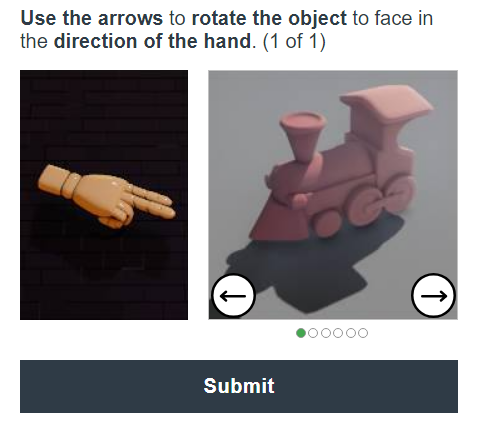

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "Instruction text asks the user to rotate an object using arrows to face the direction of a hand.")
    describe(1, "A 3D model of a train is displayed with left and right arrow buttons below it.")
    describe(2, "A hand pointing to the right is shown against a dark background.")
    describe(3, "A 'Submit' button is displayed on a dark background.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 provides instructions for interacting with the object in Frame 1.")
    relate(1, 2, "Frame 1 contains the object that needs to be rotated to match the direction shown in Frame 2.")
    relate(1, 3, "Frame 1's interaction leads to the final action of clicking the 'Submit' button in Frame 3.")

    # Step 3: Identify the sequential events and final visual criteria.
    objective("Click the left or right arrow buttons to rotate the object in Frame 1 until it faces the direction indicated by the hand in Frame 2, then click the 'Submit' button in Frame 3.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0: Instructions, not interactable
    # Frame 1: Contains the car and arrows
    left_arrow = frames[1].get_element('left', 'left arrow button')
    right_arrow = frames[1].get_element('right', 'right arrow button')
    left_arrow.set_element_as('CLICKABLE')
    right_arrow.set_element_as('CLICKABLE')
    
    # Frame 2: Hand direction, not interactable
    # Frame 3: Submit button
    submit_button = frames[3].get_element('up', 'Submit button')
    submit_button.set_element_as('NEXT')

## Solution Composition

In [ ]:
def stage3(frames):
    # Get the interactable elements for navigation
    left_arrow = frames[1].get_interactable(0)
    right_arrow = frames[1].get_interactable(1)
    
    # Get the target direction from Frame 2
    target_image = frames[2].image

    # Cycle through all choices in Frame 1
    choices = get_all_choices(left_arrow, right_arrow, frames[1])
    
    # Mark the images for comparison
    marked_images = mark([choice.image for choice in choices], "object")
    
    # Compare each choice with the target direction
    ranking = compare(marked_images, "Which image has the object aligned with the direction of the hand?", target_image)
    
    # Select the best choice
    choices[ranking.index(True)].select()

    # Click the submit button in Frame 3
    submit_button = frames[3].get_interactable(0)
    click(submit_button)

In [ ]:
PROMPT = '''
## Objective
Given the list of items, compare them with Reference and see if it satisfies the objective: Which image has the object aligned with the direction of the hand?
Output a list of (True/False) for each item.
You should follow the format answer(booleans=[True, False, ...]) to answer the question.
## Guidelines
1. First, find the orientation of the fingers in reference, there are two stretched fingers, which are thinner relative to the wrist
2. Next, find the orientation of the object's front face in each image
3. Assign True to the image that most closely matches the finger orientation
4. When assessing orientations, using the 8 cardinal directions.
5. There should only be one True value.
'''

Reference Item 0 Item 1 Item 2 Item 3 Item 4 Item 5
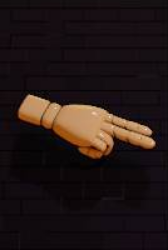
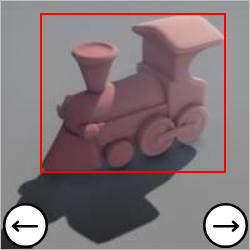
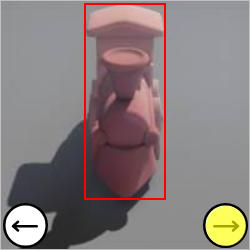
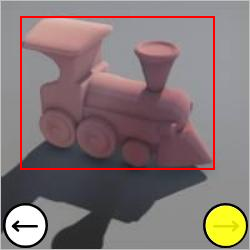
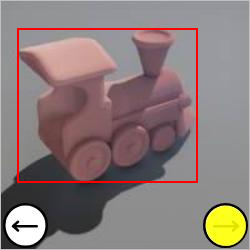
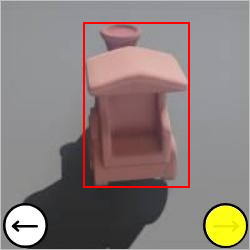
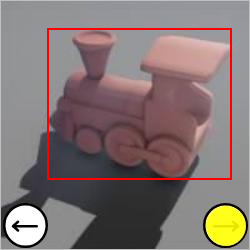

In [ ]:
IMAGES = 7

In [ ]:
RESPONSE = '''
The reference image shows a hand with two stretched fingers pointing to the **right** (East direction). We need to find the item where the object's front face aligns with this direction.

### Analysis of Items:
1. **Item 0**: The train's front face points to the **left** (West direction).  
2. **Item 1**: The train's front face points **upward** (North direction).  
3. **Item 2**: The train's front face points to the **right** (East direction).  
4. **Item 3**: The train's front face points to the **right** (East direction).  
5. **Item 4**: The train's front face points **downward** (South direction).  
6. **Item 5**: The train's front face points to the **right** (East direction).  

### Conclusion:
Items 2, 3, and 5 align with the direction of the hand (East). However, the guideline specifies that there should only be **one True value**. Based on the closest match, we select **Item 2** as the correct answer.

### Final Answer:
```python
answer(booleans=[False, False, True, False, False, False])
```
'''
TIME = 9.848680605180562
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 2145
PROMPT_TOKENS = 1878
COMPLETION_TOKENS = 267

---